<a href="https://colab.research.google.com/github/kpacker77/CSE158_Assign2/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# !pip uninstall -y numpy
# !pip install numpy==1.26.4

In [4]:
# !pip install scikit-surprise

In [5]:
# !pip install metric-learn

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data_path="/content/drive/MyDrive/CSE158_Assignment2"

In [8]:
# change directory to the project folder
%cd $data_path
# sanity check this works
import os
print("Now working in:", os.getcwd())
!ls  # list files in the folder

/content/drive/MyDrive/CSE158_Assignment2
Now working in: /content/drive/MyDrive/CSE158_Assignment2
modcloth_final_data.json.gz  renttherunway_final_data.json.gz


In [9]:
import gzip
import json

In [10]:
RTR_path = "/content/drive/MyDrive/CSE158_Assignment2/renttherunway_final_data.json.gz"

### Dataset Context:

The RentTheRunway Clothing Fit dataset contains user–item interactions collected from the Rent the Runway clothing rental platform. When a customer rents an item (dress, gown, romper, etc.), they leave a review with numerical rating, textual review, details about the event, body measurements, reported fit, and the size they rented.

#### What is it for:

* Understand how clothing fits different body types.
* Predict user–item fit satisfaction.
* Enable outfit recommendation, size prediction, item similarity, etc.

### How it was collected:

* Logged from real user rental transactions.
* Includes >190k reviews from >100k users and >5k items.
* All reviews are voluntarily provided by customers.
* This dataset is widely used in research for recommender systems and apparel fit prediction.

In [11]:
data = []
with gzip.open(RTR_path, "rt", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))

print('There are',len(data), 'entries of type', type(data[0]))

There are 192544 entries of type <class 'dict'>


In [12]:
df = pd.DataFrame(data)
df.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27,"September 26, 2016"


In [13]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   fit             192544 non-null  object
 1   user_id         192544 non-null  object
 2   bust size       174133 non-null  object
 3   item_id         192544 non-null  object
 4   weight          162562 non-null  object
 5   rating          192462 non-null  object
 6   rented for      192534 non-null  object
 7   review_text     192544 non-null  object
 8   body type       177907 non-null  object
 9   review_summary  192544 non-null  object
 10  category        192544 non-null  object
 11  height          191867 non-null  object
 12  size            192544 non-null  int64 
 13  age             191584 non-null  object
 14  review_date     192544 non-null  object
dtypes: int64(1), object(14)
memory usage: 22.0+ MB


,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
count,192544,192544,174133,192544,162562,192462,192534,192544,177907,192544,192544,191867,192544.000000,191584,192544
unique,3,105571,106,5850,190,5,9,191031,7,154740,68,24,NaN,89,2274
top,fit,691468,34b,126335,130lbs,10,wedding,.,hourglass,Stylist Review,dress,"5' 4""",NaN,31,"June 15, 2016"
freq,142058,436,27285,2241,14370,124537,57784,63,55349,977,92884,28012,NaN,14522,844
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.245175,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.494877,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN


Number of users: 105571
Number of items: 5850
Number of transactions: 192544


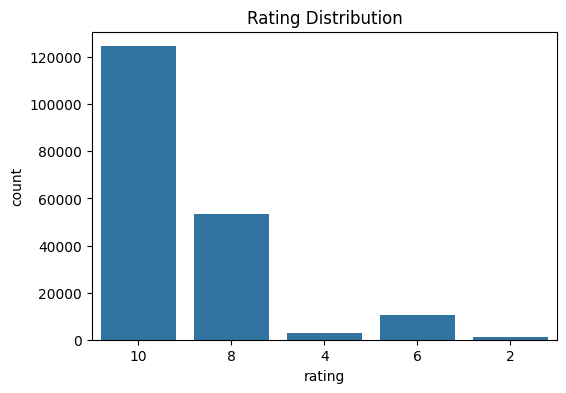

In [14]:
# -----------------------------
# Basic Statistics
# -----------------------------
print("Number of users:", df['user_id'].nunique())
print("Number of items:", df['item_id'].nunique())
print("Number of transactions:", len(df))

# Rating distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['rating'])
plt.title("Rating Distribution")
plt.show()

We see here that the rating scale is oddly 2-10 with an increment of two. The data is overwhelmingly skewed to the highest rating. This makes training a model on user ratings somwhat difficult. What is the cause of this?

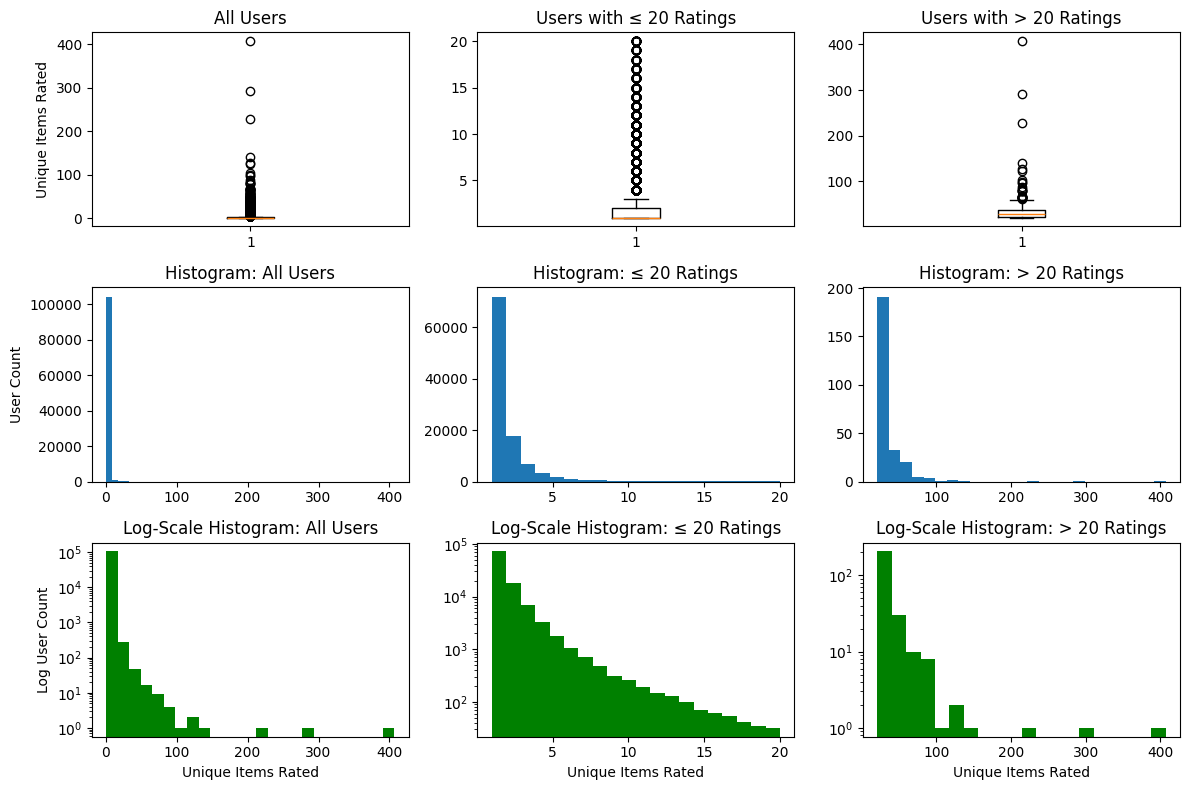

In [35]:
# Count unique items rated per user
user_item_counts = df.groupby("user_id")["item_id"].nunique()

# Define subsets
low = user_item_counts[user_item_counts <= 20]
high = user_item_counts[user_item_counts > 20]

# Set up 3 rows × 3 columns
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

# ----------------------
# Row 1 — Boxplots
# ----------------------

# 1. All users
axes[0, 0].boxplot(user_item_counts, vert=True)
axes[0, 0].set_title("All Users")
axes[0, 0].set_ylabel("Unique Items Rated")

# 2. ≤ 20 ratings
axes[0, 1].boxplot(low, vert=True)
axes[0, 1].set_title("Users with ≤ 20 Ratings")

# 3. > 20 ratings
axes[0, 2].boxplot(high, vert=True)
axes[0, 2].set_title("Users with > 20 Ratings")

# ----------------------
# Row 2 — Normal Histograms
# ----------------------

axes[1, 0].hist(user_item_counts, bins=50)
axes[1, 0].set_title("Histogram: All Users")
axes[1, 0].set_ylabel("User Count")

axes[1, 1].hist(low, bins=20)
axes[1, 1].set_title("Histogram: ≤ 20 Ratings")

axes[1, 2].hist(high, bins=25)
axes[1, 2].set_title("Histogram: > 20 Ratings")

# ----------------------
# Row 3 — Log-Scaled Histograms
# ----------------------

axes[2, 0].hist(user_item_counts, bins=25, color='green')
axes[2, 0].set_yscale("log")
axes[2, 0].set_title("Log-Scale Histogram: All Users")
axes[2, 0].set_xlabel("Unique Items Rated")
axes[2, 0].set_ylabel("Log User Count")

axes[2, 1].hist(low, bins=20, color='green')
axes[2, 1].set_yscale("log")
axes[2, 1].set_title("Log-Scale Histogram: ≤ 20 Ratings")
axes[2, 1].set_xlabel("Unique Items Rated")

axes[2, 2].hist(high, bins=20, color='green')
axes[2, 2].set_yscale("log")
axes[2, 2].set_title("Log-Scale Histogram: > 20 Ratings")
axes[2, 2].set_xlabel("Unique Items Rated")

plt.tight_layout()
plt.show()

In [37]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
#Let's normalize rating from 2-10 to 1-5
df['rating'] = df['rating']/2

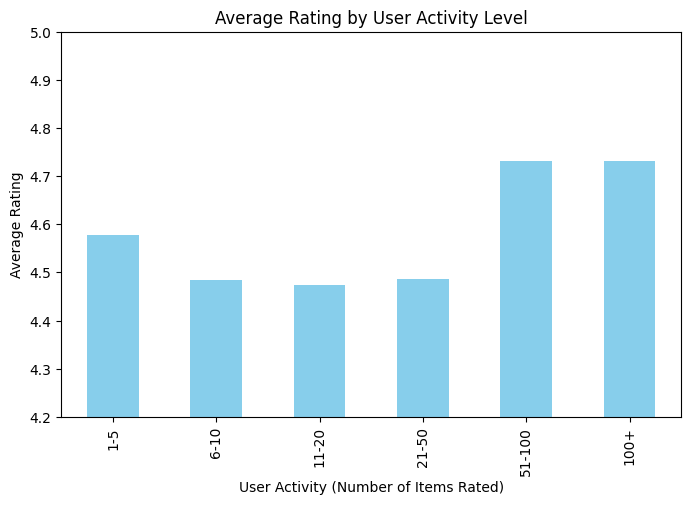

In [42]:
# Step 1: Compute per-user stats
user_stats = df.groupby("user_id").agg(
    num_items_rated=("item_id", "nunique"),
    avg_rating=("rating", "mean"))

# Step 2: Define bins for number of items rated
bins = [0, 5, 10, 20, 50, 100, np.inf]  # customize as needed
labels = ["1-5", "6-10", "11-20", "21-50", "51-100", "100+"]

user_stats["activity_bin"] = pd.cut(user_stats["num_items_rated"],
                                    bins=bins, labels=labels, right=True)

# Step 3: Compute average rating per bin
avg_rating_per_bin = user_stats.groupby("activity_bin")["avg_rating"].mean()

# Step 4: Plot as a bar chart
plt.figure(figsize=(8,5))
avg_rating_per_bin.plot(kind="bar", color="skyblue")
plt.xlabel("User Activity (Number of Items Rated)")
plt.ylabel("Average Rating")
plt.title("Average Rating by User Activity Level")

# Zoom in on y-axis
plt.ylim(4.2, 5)

plt.show()

First, let's look at our missing values.

In [15]:
#Look at each category's count of null values
df.isna().sum().sort_values(ascending=False)

,0
weight,29982
bust size,18411
body type,14637
age,960
height,677
rating,82
rented for,10
item_id,0
user_id,0
fit,0


Looking at missing data, data in the wrong format, and possibly skewed data, we will need to first *clean* the data so that our model is running accurately.

Noticing that height is provided as 5'8", we should break this down into clearer and cleaner format for our recommender systems. We will convert this into inches.

In [16]:
def h_to_in(h):
    if pd.isna(h):
        return np.nan
    # height is currently "5' 8\"" -> split on the apostrophe
    feet, inches = h.split("'")
    feet = int(feet.strip())
    inches = int(inches.replace('"', '').strip())
    return feet * 12 + inches #make conversion to inches

In [17]:
# Let's clean up some of the data
df['age'] = pd.to_numeric(df['age'], errors='coerce') #age to numeric type
df['height'] = df['height'].apply(h_to_in)

In [18]:
# We should figure a clever way to impute weight
# First we need to remove lbs out of each weight category and make it numeric

# Remove 'lbs' and convert to numeric
df['weight'] = df['weight'].str.replace('lbs', '', regex=False)  # remove the string 'lbs'
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')     # convert to float

In [19]:
"""
Group people by body type, height, and size. For each missing value in each
group, impute with the median.
"""
df['weight'] = df.groupby(['size', 'height', 'body type'])['weight'].transform(
    lambda x: x.fillna(x.median())
)
"""
Some groups had missing body type categories, so now we group by only height and
size. Then fill NaN with the median of those categories.
"""
df['weight'] = df.groupby(['size', 'height'])['weight'].transform(
    lambda x: x.fillna(x.median())
)

"""
There were still some missing values as height wasn't provided. However, all
entries provided size, so group by size and fill NaN with the median of each
size category.
"""
df['weight'] = df.groupby('size')['weight'].transform(
    lambda x: x.fillna(x.median())
    )

Now that every user has a weight, which is representative of other users with similar characteristics, we can look at the weight distribution.

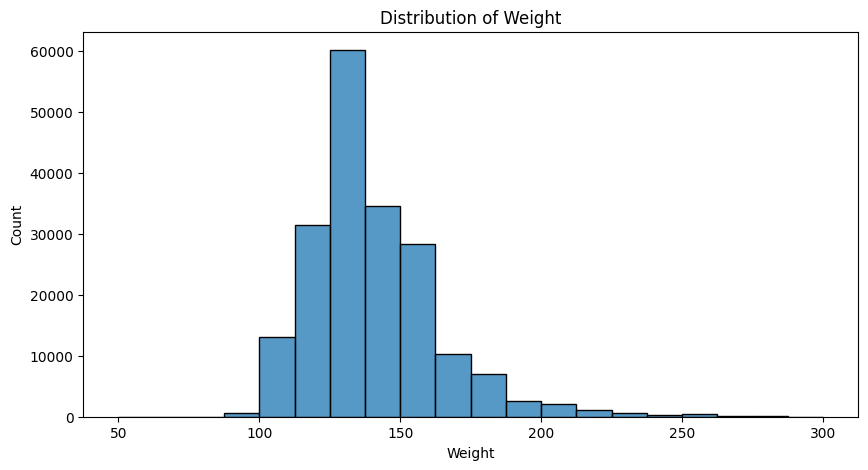

In [43]:
#Lets look at the weight distribution
plt.figure(figsize=(10,5))
sns.histplot(df['weight'].sort_values(), bins=20, kde=False)
plt.title("Distribution of Weight")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.show()

Next, let's look at sizing. The sizing seems to vary quite largely. This is likely due to a number of factors that we would need to confirm with the vendor (i.e. mix of US, EU, UK, etc. clothing sizes; some item categories are measured differently shirt: S/M/L while pants: 30/32/34/36).

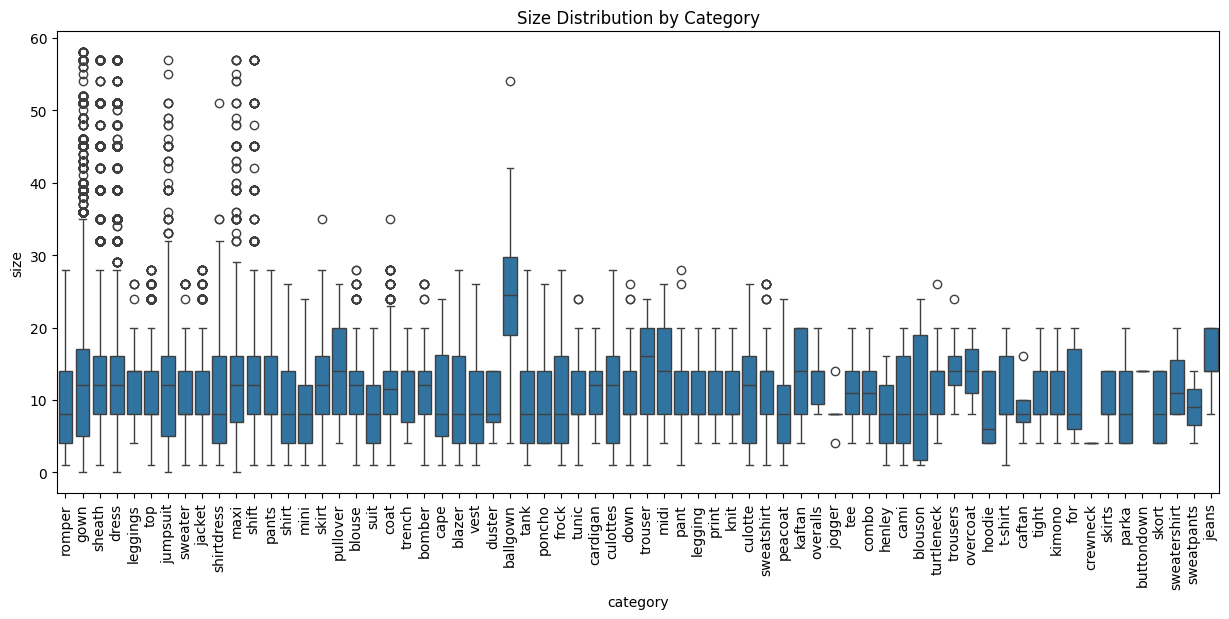

In [44]:
plt.figure(figsize=(15,6))
sns.boxplot(x='category', y='size', data=df)
plt.xticks(rotation=90)
plt.title('Size Distribution by Category')
plt.show()

We can see that there are some issues with sizing, likely due to European, UK, and US sizing differences. This only applies to a few categories. We can try to normalize these.

In [45]:
convert_categories = ['ballgown','shift','gown', 'dress', 'sheath', 'jumpsuit', 'maxi', 'pants']

In [46]:
# EU -> US mapping for numeric sizes
eu_to_us = {
    30:0, 32:1, 34:2, 36:4, 38:6, 40:8, 42:10, 44:12, 46:14,
    48:16, 50:18, 52:20, 54:22
}

# Apply EU→US conversion only for selected categories
def convert_size(row):
    if row['category'] in convert_categories:
        return eu_to_us.get(row['size'], row['size'])
    return row['size']

df['size_normalized'] = df.apply(convert_size, axis=1)

In [47]:
df = df.drop(columns=['size']).rename(columns={'size_normalized': 'size'})

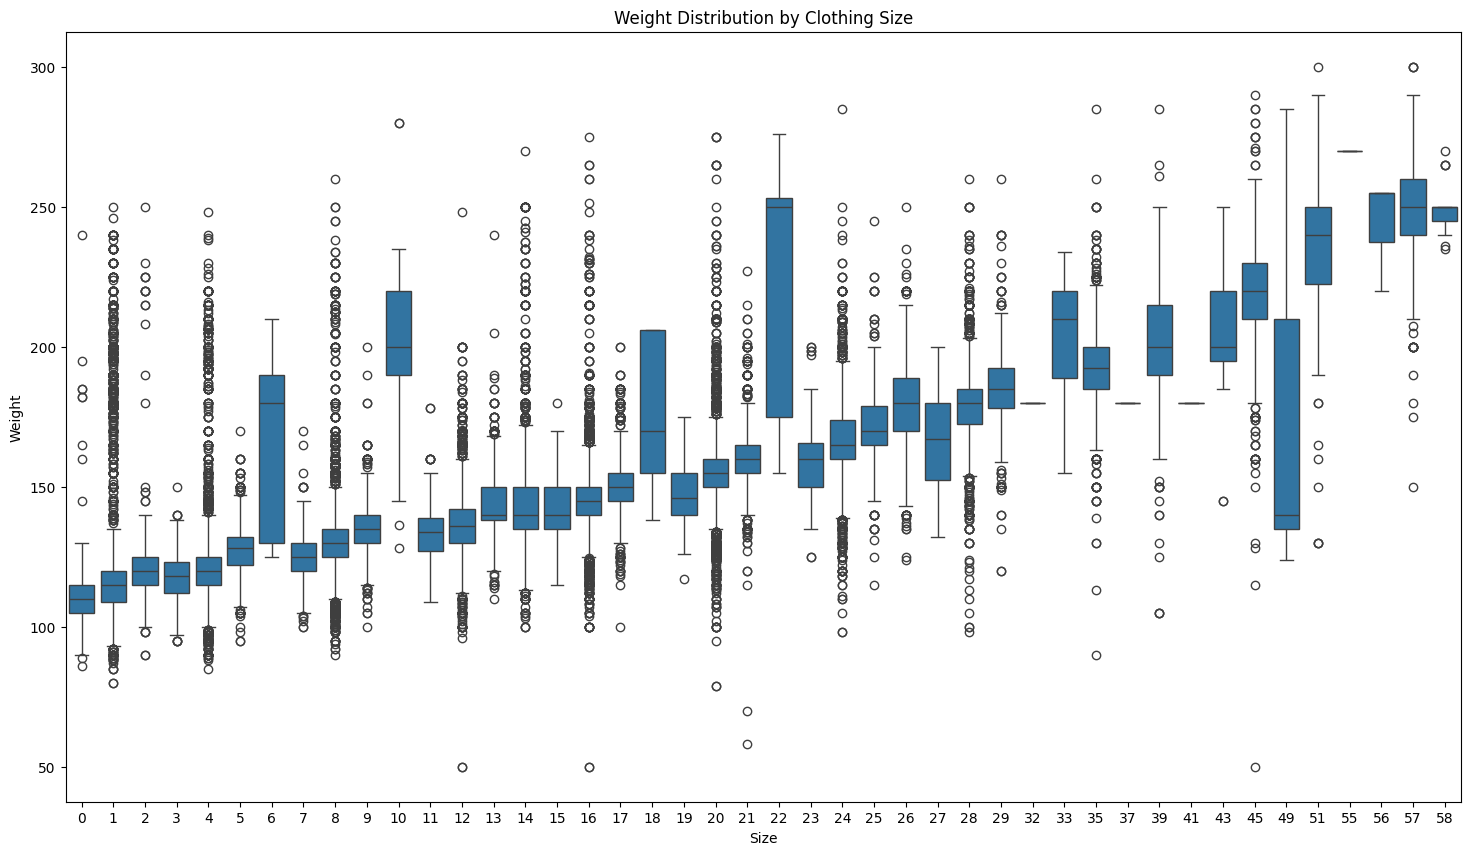

In [48]:
plt.figure(figsize=(18, 10))
sns.boxplot(x='size', y='weight', data=df)
plt.title("Weight Distribution by Clothing Size")
plt.xlabel("Size")
plt.ylabel("Weight")
plt.show()

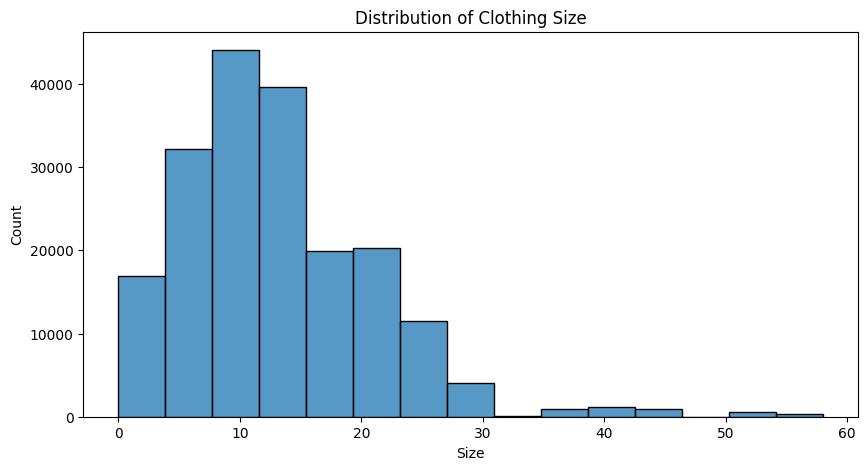

In [49]:
plt.figure(figsize=(10,5))
sns.histplot(df['size'].sort_values(), bins=15, kde=False)
plt.title("Distribution of Clothing Size")
plt.xlabel("Size")
plt.ylabel("Count")
plt.show()

In [51]:
"""
Bust size is also often left unmarked and could be a strong indicator if a user
would prefer an item from another user of a similar build. We can separate bust
into the cup and the band size. Band size is a measurement of the rib cage and could
align better with weight, height, and overall clothing size.
"""
# Extract numeric band
df['bust_band'] = df['bust size'].str.extract(r'(\d+)').astype(float)

# Extract cup letters (including extended like DDD/E, +, etc.)
df['bust_cup'] = df['bust size'].str.extract(r'([a-zA-Z\+\-/]+)')

In [56]:
# Most restrictive group
df['bust_cup'] = df.groupby(['size', 'weight', 'bust_band'])['bust_cup'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown')
)

# Less restrictive group
df['bust_cup'] = df.groupby(['bust_band', 'weight'])['bust_cup'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown')
)

# Broadest group
df['bust_cup'] = df.groupby(['bust_band'])['bust_cup'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown')
)
global_bustcup_mode = df['bust_cup'].mode()[0]
df['bust_cup'] = df['bust_cup'].replace('unkown', global_bustcup_mode)

In [58]:
# Filter band size
# Below 30 and above 42 are deemed outliers
df = df[df['bust_band'].between(30, 42)]

# Filter out entries with cup size h,i, and j
valid_cups = set(['aa','a','b','c','d','d+','dd','ddd/e','f','g'])
df = df[df['bust_cup'].str.lower().isin(valid_cups)]

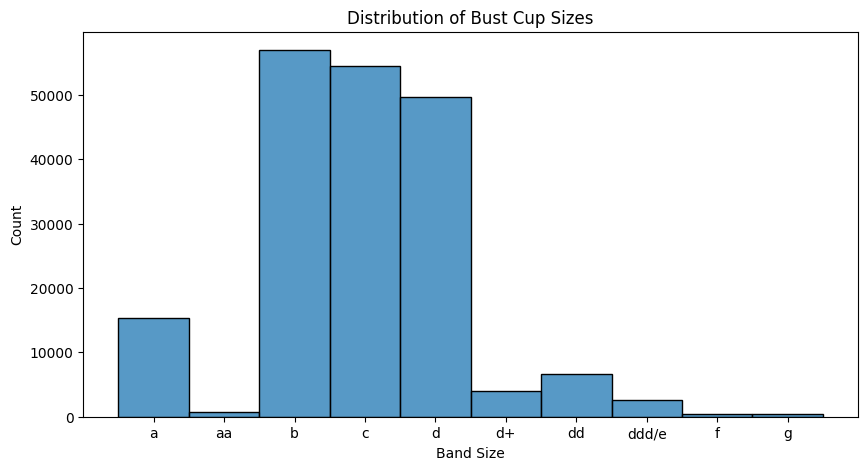

In [59]:
plt.figure(figsize=(10,5))
sns.histplot(df['bust_cup'].sort_values(), bins=10, kde=False)
plt.title("Distribution of Bust Cup Sizes")
plt.xlabel("Band Size")
plt.ylabel("Count")
plt.show()

In [60]:
df['bust_band'] = df.groupby(['size', 'weight', 'height'])['bust_band'].transform(
    lambda x: x.fillna(x.median())
    )
df['bust_band'] = df.groupby(['size', 'weight'])['bust_band'].transform(
    lambda x: x.fillna(x.median())
    )
df['bust_band'] = df.groupby(['size'])['bust_band'].transform(
    lambda x: x.fillna(x.median())
    )
df['bust_band'] = df['bust_band'].fillna(df['bust_band'].median())

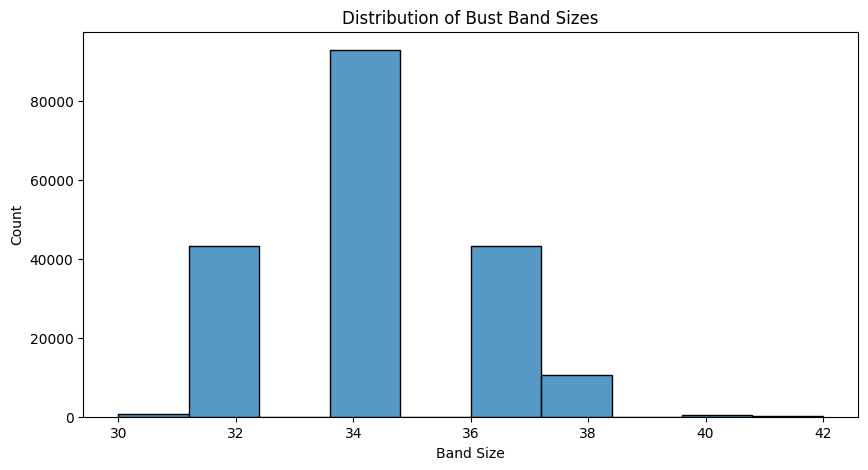

In [68]:
plt.figure(figsize=(10,5))
sns.histplot(df['bust_band'].sort_values(), bins=10, kde=False)
plt.title("Distribution of Bust Band Sizes")
plt.xlabel("Band Size")
plt.ylabel("Count")
plt.show()

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
bust_cup,18411
bust size,18411
body type,14637
age,960
height,677
rating,82
rented for,10
item_id,0
weight,0
review_text,0


In [69]:
df = df.drop(columns=['bust size'])

In [70]:
df['category'].unique()

array(['romper', 'gown', 'sheath', 'dress', 'leggings', 'top', 'jumpsuit',
       'sweater', 'jacket', 'shirtdress', 'maxi', 'shift', 'pants',
       'shirt', 'mini', 'skirt', 'pullover', 'blouse', 'suit', 'coat',
       'trench', 'bomber', 'cape', 'blazer', 'vest', 'duster', 'ballgown',
       'tank', 'poncho', 'frock', 'tunic', 'cardigan', 'culottes', 'down',
       'trouser', 'midi', 'pant', 'legging', 'print', 'knit', 'culotte',
       'sweatshirt', 'peacoat', 'kaftan', 'overalls', 'jogger', 'tee',
       'combo', 'henley', 'cami', 'blouson', 'turtleneck', 'trousers',
       'overcoat', 'hoodie', 't-shirt', 'caftan', 'tight', 'kimono',
       'for', 'crewneck', 'skirts', 'parka', 'buttondown', 'skort',
       'sweatershirt', 'sweatpants', 'jeans'], dtype=object)

Right off the bat, we see the are likely erroneous/non-clothing entries like **'for', 'combo', 'print'**. There are also duplicates and misspellings like **legging** and **leggings**.

In [71]:
# List of invalid categories
invalid_categories = ['for', 'print', 'combo']

# Keep only rows where 'category' is NOT in the invalid list
df = df[~df['category'].isin(invalid_categories)]

#Combine categories that are likely duplicates
df['category'] = df['category'].replace({
    'pant': 'pants',
    'legging': 'leggings',
    'skirts': 'skirt',
    't-shirt': 'tee',
    'culotte': 'culottes',
    'sweatershirt': 'sweatshirt'
})

In [72]:
df['body type'] = df.groupby(['size', 'bust_band','height'])['body type'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown')
)
df['body type'] = df.groupby(['size', 'bust_band'])['body type'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown')
)
df['body type'] = df.groupby(['size'])['body type'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown')
)
global_bodytype_mode = df['body type'].mode()[0]
df['body type'] = df['body type'].replace('unknown', global_bodytype_mode)

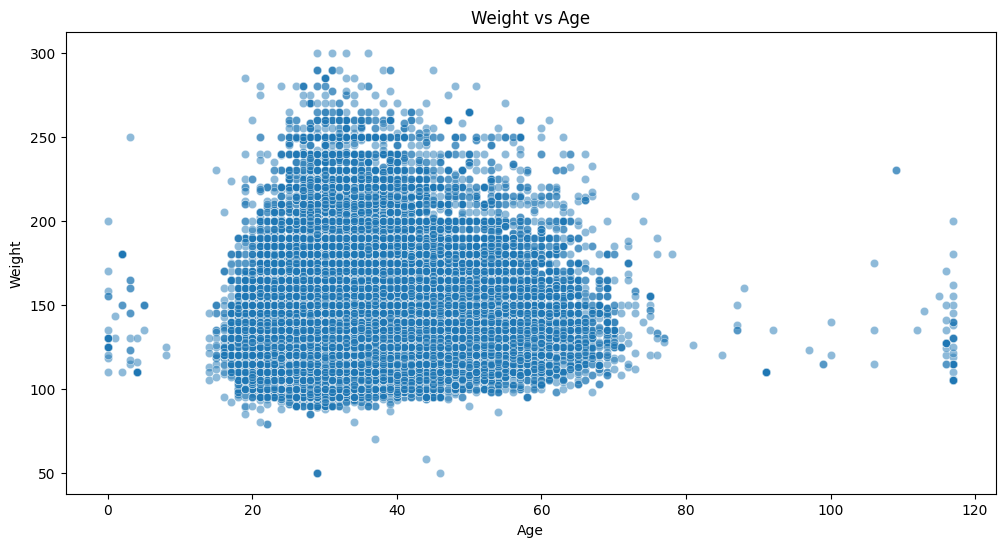

In [73]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='weight', data=df, alpha=0.5)
plt.title("Weight vs Age")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()

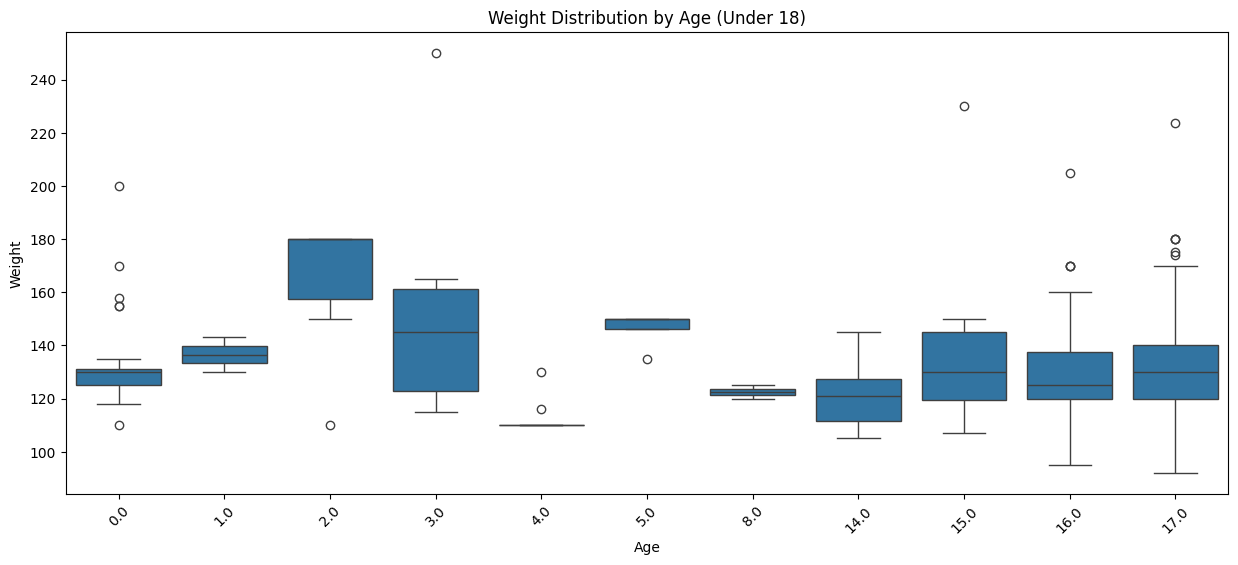

In [74]:
# Filter for ages less than 18
df_under18 = df[df['age'] < 18]

plt.figure(figsize=(15, 6))
sns.boxplot(x='age', y='weight', data=df_under18)
plt.title("Weight Distribution by Age (Under 18)")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.xticks(rotation=45)
plt.show()

Looking at weight distributions for ages less than 18, there are some intersting discoveries. There's a jump between 8 and 14. Ages 8 and less all have a minimum weight of more than 110 pounds, which seems unlikely. This is most likely erroneous data. Let's find out what percentage of the data is age < 10.


In [75]:
(df['age'] < 10).sum()/df.shape[0] *100

np.float64(0.032917596283969126)

In [76]:
"""
Entries with age missing are less than 1% of the total data. Imputing with median or mode
only adds inaccuracy rather than making the data more robust for training. There does not appear
to be a better way to deal with the missing data, so recommend dropping missing
age values.
"""
df = df[df['age'].notna()]

In [77]:
# Keep only entries with 14 <= age <= 80
df = df[(df['age'] >= 14) & (df['age'] <= 80)]

<Axes: >

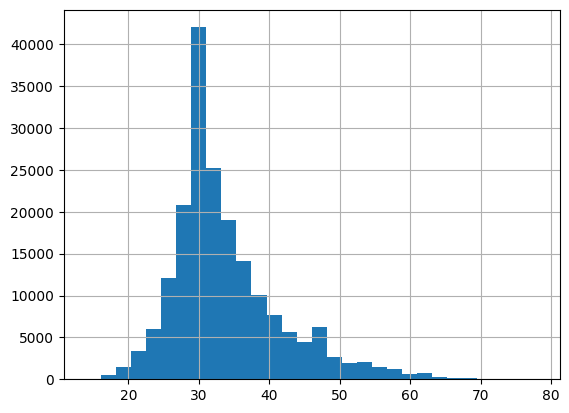

In [78]:
df['age'].hist(bins=30)

In [79]:
"""
Height is also difficult to impute since size, weight, body type, and bust are more
correlated with width rather than vertical height. With less than 1% height entries missing
recommend dropping the rest.
"""
df = df[df['height'].notna()]

<Axes: >

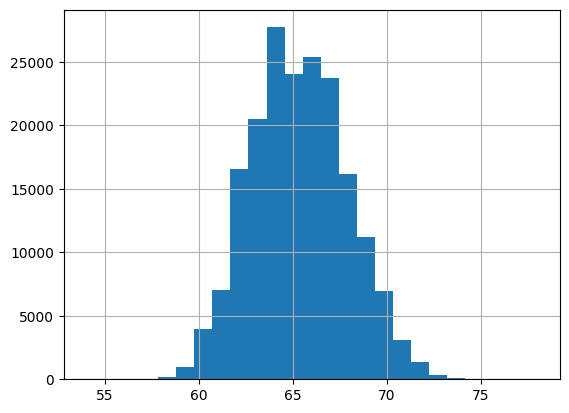

In [80]:
df['height'].hist(bins=25)

In [81]:
"""
We should also drop the remaining missing entries for rating (81) and 'rented for'.
The missing entries are inconsequential to the overall dataset. Same goes
for 'rented for' missing values.
"""
df = df.dropna(subset=['rating', 'rented for'])

In [82]:
df['review_date'] = pd.to_datetime(df['review_date'])

Most people are reviewing their items very positively. The data is heavily skewed.

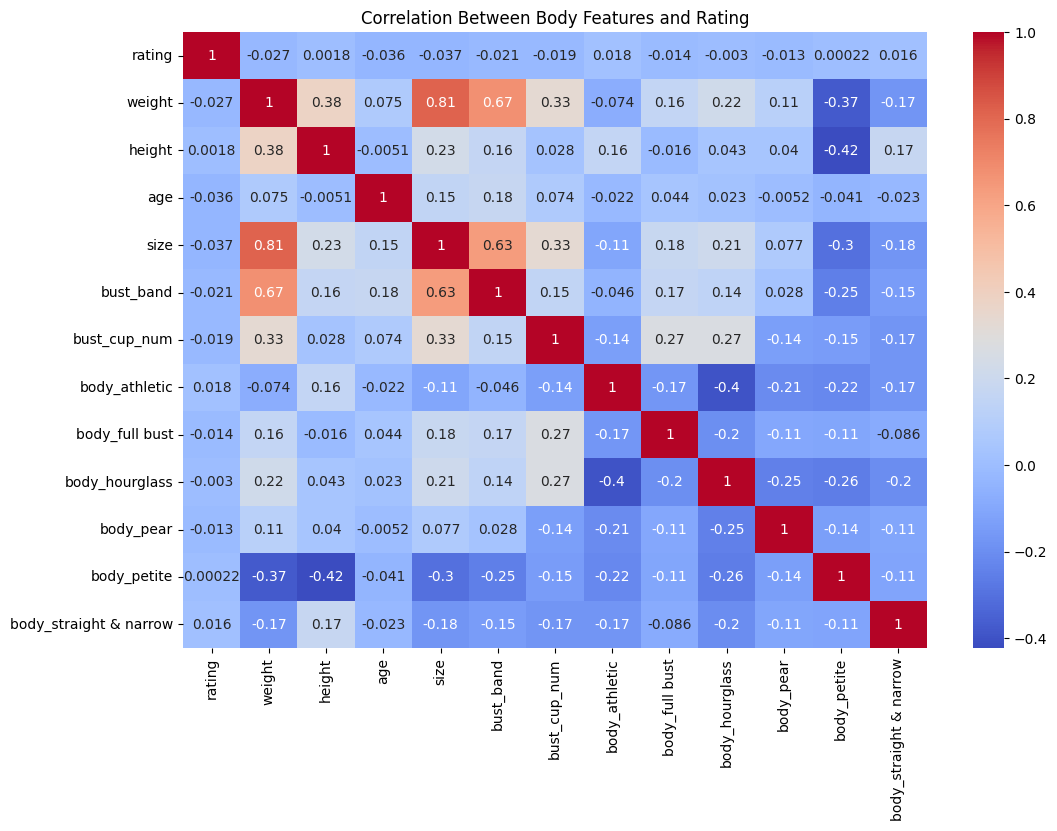

In [85]:
# Convert cup size to a numeric encoding
cup_map = {
    'aa': 1, 'a': 2, 'b': 3, 'c': 4, 'd': 5, 'dd': 6,
    'ddd': 7, 'e': 8, 'f': 9, 'g': 10
}

df['bust_cup_num'] = df['bust_cup'].map(cup_map)

# One-hot encode body type
bodytype_dummies = pd.get_dummies(df['body type'], prefix='body', drop_first=True)

# Build correlation dataframe
corr_df = pd.concat([
    df[['rating', 'weight', 'height', 'age', 'size', 'bust_band', 'bust_cup_num']],
    bodytype_dummies
], axis=1)

# Compute correlation + heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Body Features and Rating")
plt.show()

In [86]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 189525 entries, 0 to 192543
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fit             189525 non-null  object        
 1   user_id         189525 non-null  object        
 2   item_id         189525 non-null  object        
 3   weight          189525 non-null  float64       
 4   rating          189525 non-null  float64       
 5   rented for      189525 non-null  object        
 6   review_text     189525 non-null  object        
 7   body type       189525 non-null  object        
 8   review_summary  189525 non-null  object        
 9   category        189525 non-null  object        
 10  height          189525 non-null  float64       
 11  age             189525 non-null  float64       
 12  review_date     189525 non-null  datetime64[ns]
 13  size            189525 non-null  int64         
 14  bust_band       189525 non-null  float64 

,fit,user_id,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,age,review_date,size,bust_band,bust_cup,bust_cup_num
count,189525,189525,189525,189525.000000,189525.000000,189525,189525,189525,189525,189525,189525.000000,189525.000000,189525,189525.000000,189525.000000,189525,182955.000000
unique,3,103675,5836,NaN,NaN,9,188055,7,152372,59,NaN,NaN,NaN,NaN,NaN,10,NaN
top,fit,691468,126335,NaN,NaN,wedding,.,hourglass,Stylist Review,dress,NaN,NaN,NaN,NaN,NaN,b,NaN
freq,139795,436,2201,NaN,NaN,56857,63,60686,976,91633,NaN,NaN,NaN,NaN,NaN,56431,NaN
mean,NaN,NaN,NaN,138.896338,4.545970,NaN,NaN,NaN,NaN,NaN,65.311257,33.849265,2016-03-17 18:27:27.651761152,11.897211,34.228677,NaN,3.880932
min,NaN,NaN,NaN,50.000000,1.000000,NaN,NaN,NaN,NaN,NaN,54.000000,14.000000,2010-11-03 00:00:00,0.000000,30.000000,NaN,1.000000
25%,NaN,NaN,NaN,125.000000,4.000000,NaN,NaN,NaN,NaN,NaN,63.000000,29.000000,2015-04-07 00:00:00,5.000000,34.000000,NaN,3.000000
50%,NaN,NaN,NaN,135.000000,5.000000,NaN,NaN,NaN,NaN,NaN,65.000000,32.000000,2016-06-18 00:00:00,12.000000,34.000000,NaN,4.000000
75%,NaN,NaN,NaN,150.000000,5.000000,NaN,NaN,NaN,NaN,NaN,67.000000,37.000000,2017-05-14 00:00:00,16.000000,36.000000,NaN,5.000000
max,NaN,NaN,NaN,300.000000,5.000000,NaN,NaN,NaN,NaN,NaN,78.000000,78.000000,2018-01-08 00:00:00,58.000000,42.000000,NaN,10.000000


In [87]:
df[["age", "size", "height", "weight", "rating"]].describe().round(2)[1:]

,age,size,height,weight,rating
mean,33.85,11.90,65.31,138.90,4.55
std,7.87,8.14,2.66,22.42,0.71
min,14.00,0.00,54.00,50.00,1.00
25%,29.00,5.00,63.00,125.00,4.00
50%,32.00,12.00,65.00,135.00,5.00
75%,37.00,16.00,67.00,150.00,5.00
max,78.00,58.00,78.00,300.00,5.00


After some cleaning and nomalizing we see the average customer is:

* About 34 years old
* Wears size 12
* Approximately 65 inches tall
* About 139 pounds
* Average item rating is 4.55 out of 5

*NOTE: Size will vary based on garment.*



## Evaluation Metrics:
- MSE
- RMSE
- MAE
- Precision at K
- Recall at K
- NDCG@K
- MAP@K

In [ ]:
# =========================================================
# Evaluation Helpers (on val_df for MSE/RMSE/MAE + P@K/R@K)
# =========================================================

def get_recommendations(pred_df, k=10, top_pct=0.2):
    """
    pred_df: DataFrame with columns [user_id, item_id, actual_rating, predicted_rating]
    Returns only Top-K rows per user.
    """
    df_local = pred_df.copy()
    thresholds = df_local.groupby('user_id')['actual_rating'].quantile(1 - top_pct)
    df_local = df_local.join(thresholds.rename('threshold'), on='user_id')
    df_local['relevant'] = (df_local['actual_rating'] >= df_local['threshold']).astype(int)
    df_local['rank'] = df_local.groupby('user_id')['predicted_rating'] \
                               .rank(method='first', ascending=False)
    return df_local[df_local['rank'] <= k]

def precision_at_k(pred_df, k=40, top_pct=0.2):
    top_k = get_recommendations(pred_df, k, top_pct)
    return top_k.groupby('user_id')['relevant'].mean().mean()

def recall_at_k(pred_df, k=40, top_pct=0.2):
    df_local = pred_df.copy()
    thresholds = df_local.groupby('user_id')['actual_rating'].quantile(1 - top_pct)
    df_local = df_local.join(thresholds.rename('threshold'), on='user_id')
    df_local['relevant'] = (df_local['actual_rating'] >= df_local['threshold']).astype(int)
    total_rel = df_local.groupby('user_id')['relevant'].sum()

    top_k = get_recommendations(pred_df, k, top_pct)
    hits = top_k.groupby('user_id')['relevant'].sum()

    recall_user = (hits / total_rel).fillna(0)
    return recall_user.mean()

In [ ]:
def recommender_eval_gather(recommender, method_name, k=20):

    user_ids = val_df['user_id'].unique()
    recalls=[]
    precisions=[]

    for user in user_ids:
        user_val = val_df[val_df['user_id'] == user][['item_id','rating']].to_numpy()

        positives = set(user_val[user_val[:,1] >= 4][:,0])
        if not positives:
            continue

        recs = set(recommender(user)[:k])
        hits = positives.intersection(recs)

        recall = len(hits)/len(positives)
        precision = len(hits)/k

        recalls.append(recall)
        precisions.append(precision)

    return np.mean(recalls), np.mean(precisions)

In [ ]:
# =========================================================
# FIXED NDCG AND MAP FUNCTIONS
# =========================================================

import numpy as np

def dcg(rel):
    """Discounted cumulative gain for binary relevance array"""
    rel = np.asarray(rel, dtype=float)
    return np.sum((2**rel - 1) / np.log2(np.arange(2, len(rel) + 2)))


def ndcg_at_k(pred_df, k=20):
    ndcgs = []
    grouped = pred_df.groupby('user_id')

    for user, group in grouped:
        # Sort predictions by score
        group = group.sort_values('predicted_rating', ascending=False).head(k)

        # Binary relevance vector
        rel = (group['actual_rating'] >= 4).astype(int).values

        if rel.sum() == 0:
            continue  # no relevant items for this user → skip

        dcg_val = dcg(rel)
        ideal_rel = sorted(rel, reverse=True)
        idcg_val = dcg(ideal_rel)

        ndcgs.append(dcg_val / idcg_val)

    return np.mean(ndcgs) if ndcgs else 0.0


def average_precision(rel):
    rel = np.asarray(rel)
    precisions = [rel[:i+1].mean() for i in range(len(rel)) if rel[i] == 1]
    return np.mean(precisions) if precisions else 0.0


def map_at_k(pred_df, k=20):
    maps = []
    grouped = pred_df.groupby('user_id')

    for user, group in grouped:
        group = group.sort_values('predicted_rating', ascending=False).head(k)
        rel = (group['actual_rating'] >= 4).astype(int).values
        maps.append(average_precision(rel))

    return np.mean(maps) if maps else 0.0

# Models

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import coo_matrix

In [ ]:
# =========================================================
# Train / Validation / Test Split + Correct Index Mapping
# =========================================================

from sklearn.model_selection import train_test_split

# 1) Split first — no indexing before this
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=7)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=7)
# train 60% | val 20% | test 20%

print("Train size:", len(train_df))
print("Val size:  ", len(val_df))
print("Test size: ", len(test_df))

# 2) Create user/item indices **based only on TRAINING data**
train_df['user_idx'] = train_df['user_id'].astype('category').cat.codes
train_df['item_idx'] = train_df['item_id'].astype('category').cat.codes

# Save category mappings
user_categories = train_df['user_id'].astype('category').cat.categories
item_categories = train_df['item_id'].astype('category').cat.categories

# 3) Apply consistent mapping to VAL and TEST
val_df['user_idx'] = val_df['user_id'].apply(lambda u: user_categories.get_loc(u) if u in user_categories else -1)
val_df['item_idx'] = val_df['item_id'].apply(lambda i: item_categories.get_loc(i) if i in item_categories else -1)

test_df['user_idx'] = test_df['user_id'].apply(lambda u: user_categories.get_loc(u) if u in user_categories else -1)
test_df['item_idx'] = test_df['item_id'].apply(lambda i: item_categories.get_loc(i) if i in item_categories else -1)

# 4) Remove users/items not seen in training (SVD cannot predict them)
val_df = val_df[(val_df['user_idx'] != -1) & (val_df['item_idx'] != -1)]
test_df = test_df[(test_df['user_idx'] != -1) & (test_df['item_idx'] != -1)]

# 5) Final counts
num_users = train_df['user_idx'].nunique()
num_items = train_df['item_idx'].nunique()

print("Users in TRAIN:", num_users)
print("Items in TRAIN:", num_items)
print("Users in VAL:  ", val_df['user_idx'].nunique())
print("Items in VAL:  ", val_df['item_idx'].nunique())


Train size: 113715
Val size:   37905
Test size:  37905
Users in TRAIN: 72119
Items in TRAIN: 5593
Users in VAL:   13228
Items in VAL:   4272


## Baseline Models

### Ratings-based

In [ ]:
# Set top percentage for relevance (e.g., top 20% of each user's ratings)
top_pct = 0.1

In [ ]:
# 1. Global Mean
global_mean = train_df['rating'].mean()
val_preds = np.full(len(val_df), global_mean)

pred_global = pd.DataFrame({
    'user_id': val_df['user_id'],
    'item_id': val_df['item_id'],
    'actual_rating': val_df['rating'],
    'predicted_rating': val_preds
})

print("\nGLOBAL MEAN BASELINE")
mse = mean_squared_error(pred_global['actual_rating'], pred_global['predicted_rating'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(pred_global['actual_rating'], pred_global['predicted_rating'])
print("MSE:", mse, "RMSE:", rmse, "MAE:", mae)


GLOBAL MEAN BASELINE
MSE: 0.5382689410144875 RMSE: 0.7336681409291858 MAE: 0.6012818495149276


In [ ]:
# 2. User Mean
user_mean = train_df.groupby('user_id')['rating'].mean()
val_preds = val_df['user_id'].map(user_mean).fillna(global_mean)

pred_user = pd.DataFrame({
    'user_id': val_df['user_id'],
    'item_id': val_df['item_id'],
    'actual_rating': val_df['rating'],
    'predicted_rating': val_preds
})

print("USER MEAN BASELINE")
mse = mean_squared_error(pred_user['actual_rating'], pred_user['predicted_rating'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(pred_user['actual_rating'], pred_user['predicted_rating'])
print("MSE:", mse, "RMSE:", rmse, "MAE:", mae)

USER MEAN BASELINE
MSE: 0.7403810438908353 RMSE: 0.8604539754634383 MAE: 0.5770617932961603


In [ ]:
# 3. Weighted Popularity
item_counts = train_df.groupby('item_id').size()
item_avg = train_df.groupby('item_id')['rating'].mean()
k_wp = 5

def weighted_popularity(iid):
    count = item_counts.get(iid, 0)
    rating = item_avg.get(iid, global_mean)
    return (count * rating + k_wp * global_mean) / (count + k_wp)

val_preds = val_df['item_id'].map(weighted_popularity)

pred_pop = pd.DataFrame({
    'user_id': val_df['user_id'],
    'item_id': val_df['item_id'],
    'actual_rating': val_df['rating'],
    'predicted_rating': val_preds
})

print("WEIGHTED POPULARITY BASELINE")
mse = mean_squared_error(pred_pop['actual_rating'], pred_pop['predicted_rating'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(pred_pop['actual_rating'], pred_pop['predicted_rating'])
print("MSE:", mse, "RMSE:", rmse, "MAE:", mae)

WEIGHTED POPULARITY BASELINE
MSE: 0.5212001330553445 RMSE: 0.7219419180622112 MAE: 0.573314072789535


In [ ]:
# 4. Combined User–Item Mean
item_mean = train_df.groupby('item_id')['rating'].mean()

val_preds = (
    0.5 * val_df['user_id'].map(user_mean) +
    0.5 * val_df['item_id'].map(item_mean)
).fillna(global_mean)

pred_comb = pd.DataFrame({
    'user_id': val_df['user_id'],
    'item_id': val_df['item_id'],
    'actual_rating': val_df['rating'],
    'predicted_rating': val_preds
})

print("COMBINED USER–ITEM MEAN")
mse = mean_squared_error(pred_comb['actual_rating'], pred_comb['predicted_rating'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(pred_comb['actual_rating'], pred_comb['predicted_rating'])
print("MSE:", mse, "RMSE:", rmse, "MAE:", mae)

COMBINED USER–ITEM MEAN
MSE: 0.5467279704604903 RMSE: 0.7394105560921417 MAE: 0.5615745700989714


### Rankings Based

In [ ]:
# ====================================================================
# BASELINE 1 — GLOBAL POPULARITY RECOMMENDER
# ====================================================================

# Compute popularity ranking once
item_popularity = train_df.groupby('item_id').size().sort_values(ascending=False)
global_pop_list = list(item_popularity.index)

def baseline_global_pop(user_id, k=20):
    """Return top-K most popular items globally."""
    return global_pop_list[:k]

In [ ]:
# ====================================================================
# BASELINE 2 — USER MEAN RECOMMENDER
# ====================================================================

user_mean = train_df.groupby('user_id')['rating'].mean()
item_mean = train_df.groupby('item_id')['rating'].mean().fillna(user_mean.mean())

def baseline_user_mean(user_id, k=20):
    """Recommend items closest to this user's mean taste."""
    if user_id not in user_mean:
        return baseline_global_pop(user_id, k)  # cold start

    u_mean = user_mean[user_id]

    # score = -(abs(item_avg - user_mean)) so closer mean = higher score
    scores = (item_mean - u_mean).abs()
    ranked = scores.sort_values().index.tolist()  # lowest diff first
    return ranked[:k]

In [ ]:
# ====================================================================
# BASELINE 3 — WEIGHTED POPULARITY RECOMMENDER
# ====================================================================

item_counts = train_df.groupby('item_id').size()
item_avg = train_df.groupby('item_id')['rating'].mean()
k_smooth = 5  # smoothing for low-frequency items

weighted_score = ((item_counts * item_avg) + (k_smooth * global_mean)) / (item_counts + k_smooth)
weighted_ranked_list = weighted_score.sort_values(ascending=False).index.tolist()

def baseline_weighted_pop(user_id, k=20):
    return weighted_ranked_list[:k]

In [ ]:
# ====================================================================
# BASELINE 4 — USER–ITEM MEAN HYBRID
# ====================================================================

item_mean = train_df.groupby('item_id')['rating'].mean()
user_mean = train_df.groupby('user_id')['rating'].mean()

def baseline_user_item_mean(user_id, k=20):
    if user_id not in user_mean:
        return baseline_global_pop(user_id, k)  # cold start

    scores = 0.5 * user_mean[user_id] + 0.5 * item_mean
    ranked = scores.sort_values(ascending=False).index.tolist()
    return ranked[:k]

In [ ]:
for name, model in [
    ("GLOBAL POP", baseline_global_pop),
    ("USER MEAN", baseline_user_mean),
    ("WEIGHTED POP", baseline_weighted_pop),
    ("USER+ITEM MEAN", baseline_user_item_mean)
]:
    recall, precision = recommender_eval_gather(model, name, k=20)
    print(f"{name}: P@20={precision:.4f}, R@20={recall:.4f}")

GLOBAL POP: P@20=0.0048, R@20=0.0812
USER MEAN: P@20=0.0001, R@20=0.0014
WEIGHTED POP: P@20=0.0005, R@20=0.0081
USER+ITEM MEAN: P@20=0.0000, R@20=0.0004


Global Popularity is a good predictor

## TFIDF + KNN

In [ ]:
# ===========================================
# FAST ITEM-BASED TF-IDF + KNOWN NEIGHBORS
# ===========================================

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

print("\n=== FAST ITEM TF-IDF MODEL ===")

# ===========================================
# 0) SAMPLE ITEMS (not rows!) to reduce runtime
# ===========================================
item_sample_frac = 0.50  # keep 10% of items
unique_items_before = train_df['item_id'].nunique()

sampled_items = train_df['item_id'].drop_duplicates().sample(
    frac=item_sample_frac,
    random_state=42
)
train_df = train_df[train_df['item_id'].isin(sampled_items)]

unique_items_after = train_df['item_id'].nunique()

print(f"Items before sampling: {unique_items_before}")
print(f"Items after sampling:  {unique_items_after}")
print(f"Training rows after sampling: {len(train_df)}")


# ===========================================
# 1) Build item-level text
# ===========================================
train_df['tfidf_text'] = (
    train_df['category'].fillna('') + ' ' +
    train_df['review_summary'].fillna('') + ' ' +
    train_df['review_text'].fillna('')
).str.lower()

item_text = train_df.groupby('item_id')['tfidf_text'].agg(' '.join)
item_ids = item_text.index.tolist()

print("Final item count:", len(item_ids))


# ===========================================
# 2) TF-IDF Vectorization
# ===========================================
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=3000,
    min_df=5
)

tfidf_matrix = tfidf.fit_transform(item_text.values)
print("TF-IDF matrix shape:", tfidf_matrix.shape)


# ===========================================
# 3) Precompute Neighbors ONCE
# ===========================================
# dynamically adapt K so it never exceeds item count
K = min(101, len(item_ids))  # includes self

knn = NearestNeighbors(
    n_neighbors=K,
    metric='cosine',
    algorithm='brute'
).fit(tfidf_matrix)

# returns only neighbor indices since return_distance=False
item_neighbors = knn.kneighbors(tfidf_matrix, return_distance=False)

item_to_idx = {iid: idx for idx, iid in enumerate(item_ids)}
idx_to_item = np.array(item_ids)

print("Neighbor index table ready ✓", item_neighbors.shape)
print(f"Using K={K} neighbors per item")


# ===========================================
# 4) FAST Recommender
# ===========================================
def recommend_items_for_user_fast(user_id, k=60):
    """Return top-k TF-IDF similar items in O(1) time."""
    k = min(k, K - 1)  # avoid overflow for small item sets

    user_hist = train_df[train_df.user_id == user_id]
    if user_hist.empty:
        return []

    # pick user's highest-rated item
    top_item = user_hist.sort_values('rating', ascending=False).item_id.iloc[0]

    if top_item not in item_to_idx:
        return []

    idx = item_to_idx[top_item]
    rec_idx = item_neighbors[idx][1:k+1]  # skip itself
    return idx_to_item[rec_idx].tolist()


# ===========================================
# 5) Recall@K Evaluation
# ===========================================
def recommender_eval_gather_fast(recommender, method_name, k=60):
    recalls = []

    for user in val_df['user_id'].unique():
        val_user = val_df[val_df.user_id == user]
        positives = set(val_user[val_user.rating >= 4].item_id)

        if not positives:
            continue

        recs = recommender(user, k=k)
        hits = len(positives.intersection(recs))
        recalls.append(hits / len(positives))

    mean_recall = np.mean(recalls) if recalls else 0.0
    print(f"{method_name} Recall@{k}: {mean_recall:.4f}")
    return mean_recall


# ===========================================
# 6) RUN EVAL
# ===========================================
recall = recommender_eval_gather_fast(
    recommend_items_for_user_fast,
    "TFIDF_FAST_OPT",
    k=min(60, K - 1)
)


=== FAST ITEM TF-IDF MODEL ===
Items before sampling: 5593
Items after sampling:  2796
Training rows after sampling: 58390
Final item count: 2796
TF-IDF matrix shape: (2796, 3000)
Neighbor index table ready ✓ (2796, 101)
Using K=101 neighbors per item
TFIDF_FAST_OPT Recall@60: 0.0568


## SVD (Collaborative Filtering)

### Ranking

We begin by creating a pivot table so that we can feed this into our classical
SVD decomposition to pull out the important latent factors.
$A=U\Sigma V^T$. Unfortunately, buidling a pivot table consumes a lot of memory.
We can try to use a memory-efficient pipeline using 'implicit' to build the
sparse user-item and rating matrix and training an Alternating Least Squares
model.

In [ ]:
# ============================================================
# PURE SVD COLLABORATIVE FILTERING (CORRECT TOP-K RECOMMENDER)
# ============================================================

print("\n=== SVD COLLABORATIVE FILTERING (TOP-K LATENT RECS) ===")

from surprise import Dataset, Reader, SVD
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# OPTIONAL: subsample for speed (remove for full training)
# train_small = train_df.sample(100000, random_state=42)
train_small = train_df.copy()
print("Training on subset:", len(train_small))

# 1) Train SVD
reader = Reader(rating_scale=(1, 5))
train_data = Dataset.load_from_df(train_small[['user_id', 'item_id', 'rating']], reader)
trainset = train_data.build_full_trainset()

algo = SVD(
    n_factors=60,
    lr_all=0.006,
    reg_all=0.02,
    biased=True,
    random_state=42
)
algo.fit(trainset)

# 2) Extract latent factors and biases
U = algo.pu           # user latent vectors
V = algo.qi           # item latent vectors
bu = algo.bu          # user biases
bi = algo.bi          # item biases
global_bias = algo.trainset.global_mean

# helper maps raw IDs <-> internal indices
sur_uid = {trainset.to_raw_uid(i): i for i in range(trainset.n_users)}
sur_iid = {trainset.to_raw_iid(i): i for i in range(trainset.n_items)}

# user → items seen in training
train_items_by_user = train_small.groupby('user_id')['item_id'].apply(set)


# ============================================================
# 3) CORRECT SVD TOP-K RECOMMENDER
# ============================================================
def svd_recommend(user_id, k=20):
    """
    Return top-k unseen items using learned latent factors.
    Returns (item_id, score) pairs.
    """

    if user_id not in sur_uid:
        return []

    uid = sur_uid[user_id]
    seen = train_items_by_user.get(user_id, set())

    all_items = np.arange(len(V))
    unseen = np.array([i for i in all_items if trainset.to_raw_iid(i) not in seen])

    if unseen.size == 0:
        return []

    # latent prediction scores: μ + b_u + b_i + p_u · q_i
    scores = (
        global_bias +
        bu[uid] +
        bi[unseen] +
        np.dot(V[unseen], U[uid])
    )

    k_eff = min(k, len(scores))
    top_idx = np.argpartition(scores, -k_eff)[-k_eff:]
    top_idx = top_idx[np.argsort(scores[top_idx])[::-1]]

    # return (item_id, score)
    return [(trainset.to_raw_iid(int(unseen[i])), float(scores[i])) for i in top_idx]


# ============================================================
# 4) EVALUATE ON VALIDATION SET — NO LEAKAGE
# ============================================================
rows = []
val_groups = val_df.groupby('user_id')

for user in val_groups.groups:
    recs = svd_recommend(user, k=20)
    if not recs:
        continue

    actual = val_groups.get_group(user).set_index('item_id')['rating']

    for iid, score in recs:
        rows.append([user, iid, actual.get(iid, np.nan), score])

pred_svd = pd.DataFrame(rows, columns=['user_id', 'item_id', 'actual_rating', 'predicted_rating'])

# rating error metrics on overlap only
overlap = pred_svd.dropna(subset=['actual_rating'])
mse = mean_squared_error(overlap['actual_rating'], overlap['predicted_rating'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(overlap['actual_rating'], overlap['predicted_rating'])

# top-k classification metrics
pred_svd['relevant'] = pred_svd['actual_rating'].ge(4).fillna(False).astype(int)
precision = pred_svd.groupby('user_id')['relevant'].mean().mean()

pos = val_df[val_df['rating'] >= 4].groupby('user_id').size()
hits = pred_svd[pred_svd['relevant'] == 1].groupby('user_id').size()
recall = (hits / pos).fillna(0).mean()

# ============================================================
# 5) RESULTS
# ============================================================
print("\nSVD RESULTS (TOP-K LATENT RECOMMENDER)")
print("---------------------------------------")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Precision@20: {precision:.4f}")
print(f"Recall@20:    {recall:.4f}")
print(f"NDCG@20:      {ndcg_at_k(pred_svd, 20):.4f}")
print(f"MAP@20:       {map_at_k(pred_svd, 20):.4f}")
print("---------------------------------------")


=== SVD COLLABORATIVE FILTERING (TOP-K LATENT RECS) ===
Training on subset: 58390

SVD RESULTS (TOP-K LATENT RECOMMENDER)
---------------------------------------
MSE: 0.6883
RMSE: 0.8296
MAE: 0.4438
Precision@20: 0.0003
Recall@20:    0.0032
NDCG@20:      0.3445
MAP@20:       0.0010
---------------------------------------


Raw collaborative filtering (SVD) underperforms global popularity because the dataset does not contain enough overlapping user–item interactions for latent factor learning. As a result, SVD fails to generate reliable personalized rankings, while global popularity leverages strong, aggregated behavioral signals that generalize well.

### Binary Classification (Does a specific user like this item?)

In [ ]:
# =========================================================
# PERSONALIZED LIKE-PREDICTION MODEL (HYBRID RECOMMENDER)
# =========================================================

print("\n=== BUILDING PERSONALIZED LIKE MODEL ===")

import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, average_precision_score
)

# ---------------------------------------------------------
# 1) Extract user latent vectors from trained SVD
#    algo.pu → user taste embeddings
# ---------------------------------------------------------
user_latent = pd.DataFrame(
    algo.pu,
    index=train_df['user_id'].astype('category').cat.categories,
    columns=[f"user_latent_{i}" for i in range(algo.pu.shape[1])]
).reset_index().rename(columns={'index': 'user_id'})

print("User latent embedding shape:", user_latent.shape)

# ---------------------------------------------------------
# 2) Merge user latent features into train and validation sets
# ---------------------------------------------------------
train_df = train_df.merge(user_latent, on='user_id', how='left')
val_df   = val_df.merge(user_latent, on='user_id', how='left')

# ---------------------------------------------------------
# 3) Create LIKE label (binary preference)
# ---------------------------------------------------------
train_df['like'] = (train_df['rating'] >= 4.5).astype(int)
val_df['like']   = (val_df['rating'] >= 4.5).astype(int)

# ---------------------------------------------------------
# 4) Define features for prediction
#    numeric user/item features + user tastes
# ---------------------------------------------------------
latent_cols = [c for c in train_df.columns if c.startswith("user_latent_")]

num_cols = ['age', 'height', 'weight', 'size', 'bust_band'] + latent_cols
cat_cols = ['bust_cup', 'body type', 'category', 'rented for']

X_train = train_df[num_cols + cat_cols]
y_train = train_df['like']

X_val = val_df[num_cols + cat_cols]
y_val = val_df['like']

print("Numeric features:", len(num_cols), "Cat features:", len(cat_cols))
print("Train rows:", len(train_df), "Val rows:", len(val_df))

# ---------------------------------------------------------
# 5) Preprocess data: scale num + one-hot encode cat
# ---------------------------------------------------------
preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

X_train_t = preprocess.fit_transform(X_train)
X_val_t   = preprocess.transform(X_val)

print("Final feature dimensionality:", X_train_t.shape)

# ---------------------------------------------------------
# 6) Train Logistic Regression classifier
# ---------------------------------------------------------
clf = LogisticRegression(
    max_iter=300,
    class_weight='balanced',
    n_jobs=-1
)

clf.fit(X_train_t, y_train)

# ---------------------------------------------------------
# 7) Predict LIKE probability for each user–item pair
# ---------------------------------------------------------
y_val_proba = clf.predict_proba(X_val_t)[:, 1]
y_val_pred  = (y_val_proba >= 0.5).astype(int)

# ---------------------------------------------------------
# 8) Classification metrics
# ---------------------------------------------------------
acc  = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred)
rec  = recall_score(y_val, y_val_pred)
f1   = f1_score(y_val, y_val_pred)
roc  = roc_auc_score(y_val, y_val_proba)
pra  = average_precision_score(y_val, y_val_proba)

print("\n=== PERSONALIZED LIKE MODEL VALIDATION RESULTS ===")
print(f"Accuracy:     {acc:.4f}")
print(f"Precision:    {prec:.4f}")
print(f"Recall:       {rec:.4f}")
print(f"F1 Score:     {f1:.4f}")
print(f"ROC-AUC:      {roc:.4f}")        # ranking-agnostic separation metric
print(f"PR-AUC:       {pra:.4f}")       # precision–recall tradeoff for positives
print("=================================================\n")

# ---------------------------------------------------------
# 9) OPTIONAL: Ranking evaluation using LIKE probabilities
# ---------------------------------------------------------
pred_df = val_df[['user_id', 'item_id', 'rating']].copy()
pred_df = pred_df.rename(columns={'rating': 'actual_rating'})
pred_df['predicted_rating'] = y_val_proba

print("Ranking Metrics (Personalized):")
print(f"NDCG@20: {ndcg_at_k(pred_df, 20):.4f}")
print(f"MAP@20:  {map_at_k(pred_df, 20):.4f}")
print("=================================================\n")


=== BUILDING PERSONALIZED LIKE MODEL ===
User latent embedding shape: (43174, 61)
Numeric features: 65 Cat features: 4
Train rows: 58390 Val rows: 19784
Final feature dimensionality: (58390, 142)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Fit-Based Predictor

In [ ]:
# !pip install metric-learn

In [ ]:
# =========================================================
# K-LF-ML STYLE MODEL (Latent Fit Semantics + LMNN + k-NN)
# Inspired by: "Decomposing Fit Semantics for Product Size
# Recommendation in Metric Spaces" (RecSys’18)
# =========================================================

print("\n=== K-LF-ML STYLE FIT MODEL (LATENT + LMNN) ===")

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize

# You may need to install this in Colab once:
# !pip install metric-learn
from metric_learn import LMNN

# ---------------------------------------------------------
# 1) BUILD FIT-LABEL DATASET (Small / Fit / Large)
# ---------------------------------------------------------
# We only keep rows that have fit labels in the 3 main classes
valid_fits = ['small', 'fit', 'large', 'Small', 'Fit', 'Large']

train_fit_df = train_df[train_df['fit'].isin(valid_fits)].copy()
val_fit_df   = val_df[val_df['fit'].isin(valid_fits)].copy()

# Map fit string → ordinal class: Small=0, Fit=1, Large=2
fit_to_label = {
    'small': 0, 'Small': 0,
    'fit':   1, 'Fit':   1,
    'large': 2, 'Large': 2
}
train_fit_df['y'] = train_fit_df['fit'].map(fit_to_label)
val_fit_df['y']   = val_fit_df['fit'].map(fit_to_label)

print("Train fit samples:", len(train_fit_df))
print("Val fit samples:  ", len(val_fit_df))
print("Fit label distribution (train):")
print(train_fit_df['y'].value_counts(normalize=True).sort_index())

# ---------------------------------------------------------
# 2) LATENT FACTOR FIT SEMANTICS (K-LF)
# ---------------------------------------------------------
# We learn K-dimensional user/item latent factors and a small
# softmax classifier on top. This is the "fit semantics"
# stage that feeds into the metric learning stage.

K = 20                  # latent dimension (increased from 10)
lr = 0.05               # learning rate for latent + softmax
epochs = 5              # number of passes over the data
batch_size = 2048       # mini-batch size

num_users = train_df['user_idx'].nunique()
num_items = train_df['item_idx'].nunique()

rng = np.random.default_rng(42)

# User and item latent factors
U_latent = rng.normal(0.0, 0.1, size=(num_users, K))
V_latent = rng.normal(0.0, 0.1, size=(num_items, K))

# Softmax classifier parameters: 3 classes x K dims
W_clf = rng.normal(0.0, 0.1, size=(3, K))
b_clf = np.zeros(3, dtype=float)

# For faster access, keep arrays of indices/labels
u_idx_train = train_fit_df['user_idx'].values
i_idx_train = train_fit_df['item_idx'].values
y_train_cls = train_fit_df['y'].values

n_train_fit = len(train_fit_df)

print("\n[Stage 1] Training latent fit semantics (K-LF)...")
for epoch in range(epochs):
    # Shuffle indices each epoch
    perm = rng.permutation(n_train_fit)

    total_loss = 0.0
    num_batches = 0

    for start in range(0, n_train_fit, batch_size):
        end = min(start + batch_size, n_train_fit)
        batch_idx = perm[start:end]

        u_b = u_idx_train[batch_idx]
        i_b = i_idx_train[batch_idx]
        y_b = y_train_cls[batch_idx]   # (B,)

        # 1) Build latent feature for each transaction
        #    x_t = U[user] ⊙ V[item]  (elementwise product)
        x_b = U_latent[u_b] * V_latent[i_b]  # (B, K)

        # 2) Softmax logits and probabilities
        logits = x_b @ W_clf.T + b_clf      # (B, 3)
        logits -= logits.max(axis=1, keepdims=True)  # stability
        exp_logits = np.exp(logits)
        probs = exp_logits / exp_logits.sum(axis=1, keepdims=True)  # (B,3)

        # 3) Cross-entropy loss
        B = len(y_b)
        Y_onehot = np.zeros((B, 3), dtype=float)
        Y_onehot[np.arange(B), y_b] = 1.0

        eps = 1e-9
        loss = -np.sum(Y_onehot * np.log(probs + eps)) / B
        total_loss += loss
        num_batches += 1

        # 4) Backprop gradients
        # dL/dlogits = (probs - Y) / B
        grad_logits = (probs - Y_onehot) / B  # (B,3)

        # dL/dW = grad_logits^T @ x_b
        grad_W = grad_logits.T @ x_b         # (3,K)
        grad_b = grad_logits.sum(axis=0)     # (3,)

        # dL/dx = grad_logits @ W
        grad_x = grad_logits @ W_clf         # (B,K)

        # x = U[u] * V[i] => dL/dU[u] = grad_x * V[i]
        #                   dL/dV[i] = grad_x * U[u]
        grad_U = grad_x * V_latent[i_b]
        grad_V = grad_x * U_latent[u_b]

        # 5) Gradient step
        W_clf -= lr * grad_W
        b_clf -= lr * grad_b

        # Aggregate gradients on U and V because users/items can repeat
        for idx_local, u in enumerate(u_b):
            U_latent[u] -= lr * grad_U[idx_local]
        for idx_local, it in enumerate(i_b):
            V_latent[it] -= lr * grad_V[idx_local]

    avg_loss = total_loss / max(num_batches, 1)
    print(f"Epoch {epoch+1}/{epochs} - Avg loss: {avg_loss:.4f}")

print("Latent fit semantics training complete ✓")

# ---------------------------------------------------------
# 3) BUILD TRANSACTION EMBEDDINGS (X) FOR LMNN
# ---------------------------------------------------------
# For each transaction, we use x_t = U[user] ⊙ V[item]

X_train_fit = U_latent[u_idx_train] * V_latent[i_idx_train]
y_train_fit = y_train_cls

u_idx_val = val_fit_df['user_idx'].values
i_idx_val = val_fit_df['item_idx'].values
y_val_fit = val_fit_df['y'].values

X_val_fit = U_latent[u_idx_val] * V_latent[i_idx_val]

# ---------------------------------------------------------
# 4) PROTOTYPE SAMPLING TO HANDLE IMBALANCE
# ---------------------------------------------------------
# We randomly subsample up to max_per_class samples from
# each class to keep LMNN training fast and balanced.

max_per_class = 1000   # reduced from 2500 for speed
keep_indices = []

for cls in [0, 1, 2]:
    cls_idx = np.where(y_train_fit == cls)[0]
    if len(cls_idx) > max_per_class:
        cls_idx = rng.choice(cls_idx, size=max_per_class, replace=False)
    keep_indices.append(cls_idx)

keep_indices = np.concatenate(keep_indices)
X_train_sub = X_train_fit[keep_indices]
y_train_sub = y_train_fit[keep_indices]

print("\n[Stage 2] Metric learning (LMNN) on prototypes...")
print("LMNN training samples:", X_train_sub.shape[0])

# ---------------------------------------------------------
# 5) LMNN METRIC LEARNING
# ---------------------------------------------------------
lmnn = LMNN(
    k=5,             # target neighbors
    learn_rate=5e-7, # slightly smaller LR for stability
    max_iter=40,     # fewer iters; converges fast enough
    verbose=True
)

lmnn.fit(X_train_sub, y_train_sub)

X_train_lmnn = lmnn.transform(X_train_fit)
X_val_lmnn   = lmnn.transform(X_val_fit)

print("LMNN transformation complete ✓")

# ---------------------------------------------------------
# 6) k-NN CLASSIFIER IN LEARNED METRIC SPACE
# ---------------------------------------------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_lmnn, y_train_fit)

y_val_pred = knn.predict(X_val_lmnn)
y_val_proba = knn.predict_proba(X_val_lmnn)

acc = accuracy_score(y_val_fit, y_val_pred)
print("\n[Stage 3] k-NN classification in LMNN space")
print("Validation Accuracy:", acc)
print("\nClassification Report (Val):")
print(classification_report(y_val_fit, y_val_pred, target_names=['Small','Fit','Large']))

# ---------------------------------------------------------
# 7) MULTI-CLASS AUC (LIKE THE PAPER)
# ---------------------------------------------------------
# We compute macro-averaged AUC in a one-vs-rest fashion.
y_val_bin = label_binarize(y_val_fit, classes=[0,1,2])  # shape (N,3)

try:
    auc_macro = roc_auc_score(y_val_bin, y_val_proba, average='macro', multi_class='ovr')
    print(f"Macro AUC (Val, LMNN + kNN): {auc_macro:.4f}")
except Exception as e:
    print("AUC computation failed:", e)

print("\n=== K-LF-ML STYLE FIT MODEL DONE ✓ ===")


In [ ]:
# =========================================================
# FEATURE + LMNN FIT MODEL (Anthropometrics + Garment Features)
# Metric learning over explicit fit-relevant features
# =========================================================

print("\n=== FEATURE + LMNN FIT MODEL (BODY + GARMENT FEATURES) ===")

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

from metric_learn import LMNN  # !pip install metric-learn if needed

# ---------------------------------------------------------
# 1) BUILD FIT-LABEL DATASET (Small / Fit / Large)
# ---------------------------------------------------------
valid_fits = ['small', 'fit', 'large', 'Small', 'Fit', 'Large']

train_fit_df = train_df[train_df['fit'].isin(valid_fits)].copy()
val_fit_df   = val_df[val_df['fit'].isin(valid_fits)].copy()

fit_to_label = {
    'small': 0, 'Small': 0,
    'fit':   1, 'Fit':   1,
    'large': 2, 'Large': 2
}
train_fit_df['y'] = train_fit_df['fit'].map(fit_to_label)
val_fit_df['y']   = val_fit_df['fit'].map(fit_to_label)

print("Train fit samples:", len(train_fit_df))
print("Val fit samples:  ", len(val_fit_df))
print("Fit label distribution (train):")
print(train_fit_df['y'].value_counts(normalize=True).sort_index())

# ---------------------------------------------------------
# 2) DEFINE EXPLICIT USER + ITEM FEATURES
# ---------------------------------------------------------
# Same features you used for LightGBM, but now as an embedding input
num_cols = ['age', 'height', 'weight', 'size', 'bust_band']
cat_cols = ['bust_cup', 'body type', 'rented for', 'category']

# Drop rows with missing features just in case
train_fit_df = train_fit_df.dropna(subset=num_cols + cat_cols)
val_fit_df   = val_fit_df.dropna(subset=num_cols + cat_cols)

X_train_raw = train_fit_df[num_cols + cat_cols]
y_train_fit = train_fit_df['y'].values

X_val_raw = val_fit_df[num_cols + cat_cols]
y_val_fit = val_fit_df['y'].values

# ---------------------------------------------------------
# 3) PREPROCESS → STANDARDIZE NUMERIC, ONE-HOT CATEGORICAL
# ---------------------------------------------------------
preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

X_train_full = preprocess.fit_transform(X_train_raw)
X_val_full   = preprocess.transform(X_val_raw)

print("Feature space shape (before PCA):", X_train_full.shape)

# ---------------------------------------------------------
# 4) DIMENSIONALITY REDUCTION (PCA) BEFORE LMNN
# ---------------------------------------------------------
pca_dim = 30  # embedding dimension before metric learning
pca = PCA(n_components=pca_dim, random_state=42)

X_train_emb = pca.fit_transform(X_train_full)
X_val_emb   = pca.transform(X_val_full)

print("Embedded feature shape (after PCA):", X_train_emb.shape)

# ---------------------------------------------------------
# 5) PROTOTYPE SAMPLING TO BALANCE CLASSES FOR LMNN
# ---------------------------------------------------------
rng = np.random.default_rng(42)

max_per_class = 1000
keep_indices = []

for cls in [0, 1, 2]:
    cls_idx = np.where(y_train_fit == cls)[0]
    if len(cls_idx) > max_per_class:
        cls_idx = rng.choice(cls_idx, size=max_per_class, replace=False)
    keep_indices.append(cls_idx)

keep_indices = np.concatenate(keep_indices)
X_train_sub = X_train_emb[keep_indices]
y_train_sub = y_train_fit[keep_indices]

print("\n[Stage 1] Metric learning (LMNN) on body+garment features...")
print("LMNN training samples:", X_train_sub.shape[0])

lmnn = LMNN(
    k=5,
    learn_rate=1e-6,
    max_iter=100,
    verbose=True
)

lmnn.fit(X_train_sub, y_train_sub)

X_train_lmnn = lmnn.transform(X_train_emb)
X_val_lmnn   = lmnn.transform(X_val_emb)

print("LMNN transformation complete ✓")

# ---------------------------------------------------------
# 6) k-NN CLASSIFIER IN LEARNED METRIC SPACE
# ---------------------------------------------------------
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_lmnn, y_train_fit)

y_val_pred  = knn.predict(X_val_lmnn)
y_val_proba = knn.predict_proba(X_val_lmnn)

acc = accuracy_score(y_val_fit, y_val_pred)
print("\n[Stage 2] k-NN classification in LMNN space")
print("Validation Accuracy:", acc)
print("\nClassification Report (Val):")
print(classification_report(
    y_val_fit,
    y_val_pred,
    target_names=['Small','Fit','Large']
))

# ---------------------------------------------------------
# 7) MULTI-CLASS MACRO AUC (MAIN PAPER METRIC)
# ---------------------------------------------------------
y_val_bin = label_binarize(y_val_fit, classes=[0,1,2])

try:
    auc_macro = roc_auc_score(
        y_val_bin,
        y_val_proba,
        average='macro',
        multi_class='ovr'
    )
    print(f"Macro AUC (Val, FEATURE + LMNN): {auc_macro:.4f}")
except Exception as e:
    print("AUC computation failed:", e)

print("\n=== FEATURE + LMNN FIT MODEL DONE ✓ ===")


In [ ]:
# =========================================================
# UPDATED FEATURE + LMNN FIT MODEL
# (BODY FEATURES + GARMENT TEXT EMBEDDINGS)
# =========================================================

print("\n=== UPDATED FEATURE + LMNN FIT MODEL (BODY + GARMENT TEXT) ===")

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

from metric_learn import LMNN  # make sure: pip install metric-learn

# ---------------------------------------------------------
# 0) BUILD ITEM-LEVEL GARMENT TEXT EMBEDDINGS
# ---------------------------------------------------------
print("\n[Step 0] Building garment text embeddings...")

item_text_df = (
    train_df[['item_id', 'category', 'review_summary', 'review_text']]
    .fillna('')
    .copy()
)

item_text_df['tfidf_text'] = (
    item_text_df['category'] + ' ' +
    item_text_df['review_summary'] + ' ' +
    item_text_df['review_text']
).str.lower()

# One document per item
item_text_grouped = item_text_df.groupby('item_id')['tfidf_text'].apply(' '.join)

tfidf_text = TfidfVectorizer(
    stop_words='english',
    max_features=2000,
    min_df=5
)
X_tfidf_items = tfidf_text.fit_transform(item_text_grouped.values)

# Compress text to low-dim embedding
text_dim = 20
svd_text = TruncatedSVD(n_components=text_dim, random_state=42)
X_item_text_emb = svd_text.fit_transform(X_tfidf_items)

text_cols = [f"text_emb_{i}" for i in range(text_dim)]
item_text_emb = pd.DataFrame(
    X_item_text_emb,
    index=item_text_grouped.index,
    columns=text_cols
)

print("Garment text embedding shape:", item_text_emb.shape)

# ---------------------------------------------------------
# 1) BUILD FIT-LABEL DATASET (Small / Fit / Large)
# ---------------------------------------------------------
print("\n[Step 1] Building fit label dataset...")

valid_fits = ['small', 'fit', 'large', 'Small', 'Fit', 'Large']

train_fit_df = train_df[train_df['fit'].isin(valid_fits)].copy()
val_fit_df   = val_df[val_df['fit'].isin(valid_fits)].copy()

fit_to_label = {
    'small': 0, 'Small': 0,
    'fit':   1, 'Fit':   1,
    'large': 2, 'Large': 2
}
train_fit_df['y'] = train_fit_df['fit'].map(fit_to_label)
val_fit_df['y']   = val_fit_df['fit'].map(fit_to_label)

print("Train fit samples:", len(train_fit_df))
print("Val fit samples:  ", len(val_fit_df))
print("Fit label distribution (train):")
print(train_fit_df['y'].value_counts(normalize=True).sort_index())

# ---------------------------------------------------------
# 2) MERGE GARMENT TEXT EMBEDDINGS INTO FIT DATA
# ---------------------------------------------------------
print("\n[Step 2] Merging garment embeddings into fit data...")

train_fit_df = train_fit_df.merge(item_text_emb, on='item_id', how='left')
val_fit_df   = val_fit_df.merge(item_text_emb, on='item_id', how='left')

# Fill missing text embeddings (should be rare) with 0
train_fit_df[text_cols] = train_fit_df[text_cols].fillna(0.0)
val_fit_df[text_cols]   = val_fit_df[text_cols].fillna(0.0)

# ---------------------------------------------------------
# 3) DEFINE EXPLICIT USER + ITEM FEATURES
# ---------------------------------------------------------
# Original numeric features
base_num_cols = ['age', 'height', 'weight', 'size', 'bust_band']
# Extend with text embedding dims
num_cols = base_num_cols + text_cols

cat_cols = ['bust_cup', 'body type', 'rented for', 'category']

# Drop rows with missing body/garment features
train_fit_df = train_fit_df.dropna(subset=base_num_cols + cat_cols)
val_fit_df   = val_fit_df.dropna(subset=base_num_cols + cat_cols)

X_train_raw = train_fit_df[num_cols + cat_cols]
y_train_fit = train_fit_df['y'].values

X_val_raw = val_fit_df[num_cols + cat_cols]
y_val_fit = val_fit_df['y'].values

print("Numeric feature columns:", num_cols)
print("Categorical feature columns:", cat_cols)

# ---------------------------------------------------------
# 4) PREPROCESS → STANDARDIZE NUMERIC, ONE-HOT CATEGORICAL
# ---------------------------------------------------------
print("\n[Step 3] Preprocessing (scaling + one-hot)...")

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

X_train_full = preprocess.fit_transform(X_train_raw)
X_val_full   = preprocess.transform(X_val_raw)

print("Feature space shape (before PCA):", X_train_full.shape)

# ---------------------------------------------------------
# 5) DIMENSIONALITY REDUCTION (PCA) BEFORE LMNN
# ---------------------------------------------------------
print("\n[Step 4] PCA embedding before LMNN...")

pca_dim = 30
pca = PCA(n_components=pca_dim, random_state=42)

X_train_emb = pca.fit_transform(X_train_full)
X_val_emb   = pca.transform(X_val_full)

print("Embedded feature shape (after PCA):", X_train_emb.shape)

# ---------------------------------------------------------
# 6) PROTOTYPE SAMPLING TO BALANCE CLASSES FOR LMNN
# ---------------------------------------------------------
print("\n[Step 5] Prototype sampling for LMNN...")

rng = np.random.default_rng(42)

max_per_class = 1000
keep_indices = []

for cls in [0, 1, 2]:
    cls_idx = np.where(y_train_fit == cls)[0]
    if len(cls_idx) > max_per_class:
        cls_idx = rng.choice(cls_idx, size=max_per_class, replace=False)
    keep_indices.append(cls_idx)

keep_indices = np.concatenate(keep_indices)
X_train_sub = X_train_emb[keep_indices]
y_train_sub = y_train_fit[keep_indices]

print("LMNN training samples:", X_train_sub.shape[0])

# ---------------------------------------------------------
# 7) LMNN METRIC LEARNING
# ---------------------------------------------------------
print("\n[Step 6] Metric learning (LMNN)...")

lmnn = LMNN(
    k=5,             # target neighbors
    learn_rate=1e-6, # safe learning rate
    max_iter=100,
    verbose=True
)

lmnn.fit(X_train_sub, y_train_sub)

X_train_lmnn = lmnn.transform(X_train_emb)
X_val_lmnn   = lmnn.transform(X_val_emb)

print("LMNN transformation complete ✓")

# ---------------------------------------------------------
# 8) k-NN CLASSIFIER IN LEARNED METRIC SPACE
# ---------------------------------------------------------
print("\n[Step 7] k-NN classifier in LMNN space...")

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_lmnn, y_train_fit)

y_val_pred  = knn.predict(X_val_lmnn)
y_val_proba = knn.predict_proba(X_val_lmnn)

acc = accuracy_score(y_val_fit, y_val_pred)
print("\nValidation Accuracy:", acc)
print("\nClassification Report (Val):")
print(classification_report(
    y_val_fit,
    y_val_pred,
    target_names=['Small','Fit','Large']
))

# ---------------------------------------------------------
# 9) MULTI-CLASS MACRO AUC
# ---------------------------------------------------------
print("\n[Step 8] Macro AUC...")

y_val_bin = label_binarize(y_val_fit, classes=[0,1,2])

try:
    auc_macro = roc_auc_score(
        y_val_bin,
        y_val_proba,
        average='macro',
        multi_class='ovr'
    )
    print(f"Macro AUC (Val, FEATURE + GARMENT LMNN): {auc_macro:.4f}")
except Exception as e:
    print("AUC computation failed:", e)

print("\n=== UPDATED FEATURE + LMNN FIT MODEL DONE ✓ ===")

## TFIDF + SVD

In [ ]:
# ==========================================
# SAMPLE DATA FOR FAST EXPERIMENTATION
# ==========================================

SAMPLE_USERS = 70000          # adjust here
SAMPLE_ITEMS = 5500          # adjust here

print("Original rows:", len(df))

user_sample = df['user_id'].drop_duplicates().sample(SAMPLE_USERS, random_state=42)
df_small = df[df['user_id'].isin(user_sample)]

item_sample = df_small['item_id'].drop_duplicates().sample(SAMPLE_ITEMS, random_state=42)
df_small = df_small[df_small['item_id'].isin(item_sample)]

print("Sampled rows:", len(df_small))
print("Unique users:", df_small['user_id'].nunique())
print("Unique items:", df_small['item_id'].nunique())


In [ ]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df_small, test_size=0.2, random_state=7)

train_df['user_idx'] = train_df['user_id'].astype('category').cat.codes
train_df['item_idx'] = train_df['item_id'].astype('category').cat.codes

user_cats = train_df['user_id'].astype('category').cat.categories
item_cats = train_df['item_id'].astype('category').cat.categories

val_df['user_idx'] = val_df['user_id'].apply(lambda u: user_cats.get_loc(u) if u in user_cats else -1)
val_df['item_idx'] = val_df['item_id'].apply(lambda i: item_cats.get_loc(i) if i in item_cats else -1)

val_df = val_df[(val_df['user_idx'] != -1) & (val_df['item_idx'] != -1)]

num_users = train_df['user_idx'].nunique()
num_items = train_df['item_idx'].nunique()

print(num_users, num_items)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

print("\n=== BUILDING TF-IDF ITEM INDEX ===")

train_df['tfidf_text'] = (
    train_df['category'].fillna('') + ' ' +
    train_df['review_summary'].fillna('') + ' ' +
    train_df['review_text'].fillna('')
).str.lower()

item_text = train_df.groupby('item_id')['tfidf_text'].apply(' '.join)
item_ids = item_text.index.tolist()

tfidf = TfidfVectorizer(max_features=4000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(item_text)
similarity = cosine_similarity(tfidf_matrix)

print("TF-IDF ready:", tfidf_matrix.shape)

In [ ]:
def tfidf_candidates(user_id, k=300):
    user_rows = train_df[train_df['user_id'] == user_id]
    if user_rows.empty:
        return []

    top_item = user_rows.sort_values('rating', ascending=False).iloc[0]['item_id']
    if top_item not in item_ids:
        return []

    idx = item_ids.index(top_item)
    sims = similarity[idx]
    cand_idx = sims.argsort()[::-1][1:k+1]
    return [item_ids[i] for i in cand_idx]


In [ ]:
from surprise import Dataset, Reader, SVD

print("\n=== TRAINING SVD ===")

reader = Reader(rating_scale=(1,5))
svd_data = Dataset.load_from_df(train_df[['user_id','item_id','rating']], reader)
svd_trainset = svd_data.build_full_trainset()

svd = SVD(
    n_factors=80,
    lr_all=0.006,
    reg_all=0.03,
    biased=True,
    random_state=42
)
svd.fit(svd_trainset)

print("SVD done.")


In [ ]:
def svd_rerank(user_id, candidates, top_k=20):
    scored = [(item, svd.predict(user_id, item).est) for item in candidates]
    ranked = sorted(scored, key=lambda x: x[1], reverse=True)
    return [item for item, _ in ranked[:top_k]]

def hybrid_recommender(user_id, k_candidates=300, k_final=20):
    cands = tfidf_candidates(user_id, k_candidates)
    if not cands: return []
    return svd_rerank(user_id, cands, k_final)


In [ ]:
# ============================================================
# HYBRID (TF-IDF + SVD) FULL EVALUATION BLOCK
# ============================================================

print("\n=== HYBRID MODEL EVALUATION (TF-IDF + SVD) ===")

K_FINAL = 20  # final number of recommendations

# 1) Standard ranking metrics
recall, precision = recommender_eval_gather(
    recommender=hybrid_recommender,
    method_name="Hybrid TFIDF+SVD",
    k=K_FINAL
)

# Build pred_df for NDCG / MAP
rows = []
val_groups = val_df.groupby('user_id')
for user in val_groups.groups:
    recs = hybrid_recommender(user, k_candidates=300, k_final=K_FINAL)
    if not recs:
        continue
    actual = val_groups.get_group(user).set_index('item_id')['rating']
    for iid in recs:
        rows.append([user, iid, actual.get(iid, np.nan), 1.0])  # score = 1 (ranking-based)

pred_hybrid = pd.DataFrame(rows, columns=['user_id', 'item_id', 'actual_rating', 'predicted_rating'])

ndcg = ndcg_at_k(pred_hybrid, K_FINAL)
mapk = map_at_k(pred_hybrid, K_FINAL)


# 2) Coverage — how many unique items are ever recommended
all_recs = []
for user in val_df['user_id'].unique():
    all_recs.extend(hybrid_recommender(user, k_final=K_FINAL))

coverage = len(set(all_recs)) / train_df['item_id'].nunique()


# 3) Candidate Reduction — efficiency vs. pure SVD
full_catalog = train_df['item_id'].nunique()
reduced_catalog = 300  # TF-IDF candidate pool
reduction = 1 - reduced_catalog / full_catalog


# 4) Cold-start user performance (users with ≤ 3 interactions)
user_inter_count = train_df.groupby('user_id').size()
cold_users = user_inter_count[user_inter_count <= 3].index

cold_recalls = []
for cu in cold_users:
    val_items = set(val_df[val_df.user_id == cu][val_df.rating >= 4]['item_id'])
    if not val_items:
        continue
    recs = set(hybrid_recommender(cu, k_final=K_FINAL))
    cold_recalls.append(len(val_items.intersection(recs)) / len(val_items))

cold_recall = np.mean(cold_recalls) if cold_recalls else 0.0


# ============================================================
# DISPLAY RESULTS
# ============================================================
print("\nHYBRID MODEL RESULTS (TF-IDF + SVD)")
print("---------------------------------------------")
print(f"Precision@{K_FINAL}:  {precision:.4f}")
print(f"Recall@{K_FINAL}:     {recall:.4f}")
print(f"NDCG@{K_FINAL}:       {ndcg:.4f}")
print(f"MAP@{K_FINAL}:        {mapk:.4f}")
print("---------------------------------------------")
print(f"Item Coverage:        {coverage:.4f}")
print(f"Catalog Reduction:    {reduction*100:.2f}% fewer items scored")
print(f"Cold-Start Recall:    {cold_recall:.4f}")
print("---------------------------------------------\n")

TF-IDF overcomes SVD’s sparsity limitations by generating semantically meaningful item neighborhoods independent of user interactions, allowing SVD to personalize only within a relevant set of candidates rather than the full, sparse item space.

## Final Reccommender System

In [ ]:
# ============================================================
# FINAL RECOMMENDER PIPELINE
# TF-IDF CANDIDATES ➜ SVD RE-RANK ➜ FIT FILTER ➜ FALLBACK
# ============================================================

print("\n=== FINAL PRODUCTION RECOMMENDER PIPELINE ===")

# ------------------------------------------------------------
# 1) GLOBAL POPULARITY (fallback for cold-start users)
# ------------------------------------------------------------
global_pop_ranked = train_df.groupby('item_id').size().sort_values(ascending=False).index.tolist()

def fallback_global_pop(k=20):
    """Return top-K globally popular items."""
    return global_pop_ranked[:k]

# ------------------------------------------------------------
# 2) TF-IDF Candidate Generator (Already Built)
#     tfidf_candidates(user_id, k_candidates)
# ------------------------------------------------------------

# ------------------------------------------------------------
# 3) SVD Re-Ranker (Already Built)
#     svd_rerank(user_id, candidates, k_final)
# ------------------------------------------------------------

# ------------------------------------------------------------
# 4) FIT FILTER: Reject items predicted not to fit
#     Uses your FEATURE + LMNN model (y ∈ {Small,Fit,Large})
# ------------------------------------------------------------

FIT_CLASS = 1  # 0=Small, 1=Fit, 2=Large

def filter_by_fit(user_id, item_ids):
    """
    Returns only items predicted to FIT the user.
    Uses the FEATURE + LMNN metric-space KNN model you trained.
    """

    # Extract rows for this user-item pair from val_df
    tmp = df[df['item_id'].isin(item_ids) & (df['user_id'] == user_id)]
    if tmp.empty:
        return []

    # Prepare features
    X_raw = tmp[num_cols + cat_cols].copy()
    X_full = preprocess.transform(X_raw)       # scale + one-hot
    X_emb  = pca.transform(X_full)             # PCA embedding
    X_fit  = lmnn.transform(X_emb)             # metric-learn space

    preds = knn.predict(X_fit)
    tmp['fit_pred'] = preds

    # Keep only items predicted 'FIT'
    return tmp[tmp['fit_pred'] == FIT_CLASS]['item_id'].tolist()

# ------------------------------------------------------------
# 5) FULL PIPELINE
# ------------------------------------------------------------

def final_recommender(user_id, k_candidates=300, k_final=20):
    """
    Master recommender combining:
      TF-IDF → SVD → FIT FILTER → fallback
    Returns top-K usable items.
    """

    # COLD START: no previous ratings → use global popularity
    if user_id not in train_df['user_id'].unique():
        return fallback_global_pop(k_final)

    # Step 1 — TF-IDF candidates
    cands = tfidf_candidates(user_id, k_candidates)
    if not cands:
        return fallback_global_pop(k_final)

    # Step 2 — SVD ranking
    ranked = svd_rerank(user_id, cands, top_k=k_final * 3)  # widen pool

    # Step 3 — Fit filtering
    filtered = filter_by_fit(user_id, ranked)

    # If nothing fits, fallback to best available
    if not filtered:
        filtered = ranked

    # Return final K items
    return filtered[:k_final]

print("FINAL PIPELINE READY ✓")

#